# ***UK HOUSING DATA REVISTED***

In [ ]:
!pip install kaggle
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastbook
#fastbook.setup_book()
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import seaborn as sns
sns.set_style("whitegrid")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 668.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


The code below utilizes the `opencage` library to retrieve latitude and longitude coordinates for each unique location (Town/City, District, County combination) in the dataset. It defines a function `get_lat_long` that takes a row as input, constructs a location string, and uses the `OpenCageGeocode` object to fetch coordinates. The results are cached to avoid redundant API calls. Finally, the coordinates are merged back into the main dataframe (`df`) based on the location information.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UkHousingPaid/UkHousing.csv', low_memory=False)

In [ ]:
ge = pd.read_csv("/content/drive/MyDrive/loLaHousing.csv", low_memory=False)

In [ ]:
cols = ge.columns
last_two_cols = ge.iloc[:, -2:]

In [ ]:
df = pd.concat([df, last_two_cols], axis=1)
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,latitude,longitude
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,53.496046,-2.517149
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,51.414351,-0.744992
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,51.489334,-0.144055
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,52.725798,-1.374138
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,53.726435,-1.714094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,53.797418,-1.543794
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,53.925980,-1.377634
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,53.646664,-1.782248
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,53.722923,-1.860487


In [ ]:
print(df.isnull().sum())

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['date']=df['Date of Transfer']
df['type']=df['Property Type']
df['ppd']=df['PPDCategory Type']
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,date,type,ppd
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,2004-07-16 00:00,T,A
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,2004-05-28 00:00,S,A
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,2004-05-25 00:00,F,A
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,2004-05-07 00:00,S,A
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,2004-05-28 00:00,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2017-02-20 00:00,S,A
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,2017-02-15 00:00,D,A
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,2017-02-24 00:00,D,A
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,2017-02-22 00:00,T,A


In [ ]:
dep_var = 'Price'
df[dep_var] = np.log(df[dep_var])

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,date,type,ppd,year,month
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},11.512925,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,2004-07-16,T,A,2004,7
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},12.323856,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,2004-05-28,S,A,2004,5
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},12.206073,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,2004-05-25,F,A,2004,5
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},11.580584,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,2004-05-07,S,A,2004,5
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},11.951180,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,2004-05-28,D,A,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},12.072541,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2017-02-20,S,A,2017,2
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},13.282686,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,2017-02-15,D,A,2017,2
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},12.520883,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,2017-02-24,D,A,2017,2
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},10.491274,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,2017-02-22,T,A,2017,2


In [ ]:
df['region'] = np.where(df['Town/City'] == 'LONDON', 1, 0)

In [ ]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only',
       'date', 'type', 'ppd', 'year', 'month', 'region'],
      dtype='object')

In [ ]:
df.drop(['date','Transaction unique identifier','Date of Transfer','Property Type',
         'PPDCategory Type','Record Status - monthly file only', 'ppd'], axis=1, inplace=True)

In [ ]:
df

,Price,Old/New,Duration,Town/City,District,County,type,year,month,region
0,11.512925,N,L,LEIGH,WIGAN,GREATER MANCHESTER,T,2004,7,0
1,12.323856,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,S,2004,5,0
2,12.206073,N,L,LONDON,LAMBETH,GREATER LONDON,F,2004,5,1
3,11.580584,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,S,2004,5,0
4,11.951180,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,D,2004,5,0
...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,N,F,LEEDS,LEEDS,WEST YORKSHIRE,S,2017,2,0
11244670,13.282686,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,D,2017,2,0
11244671,12.520883,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,D,2017,2,0
11244672,10.491274,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,T,2017,2,0


In [ ]:
print(df[['Town/City' ,'District', 'County']].nunique())

Town/City    1168
District      391
County        117
dtype: int64


In [ ]:
unique_locations = df[['Town/City', 'District', 'County']].drop_duplicates()
num_unique_locations = len(unique_locations)
print(f"Number of unique locations: {num_unique_locations}")

Number of unique locations: 4709


In [ ]:
!pip3 install opencage

The code initializes the `OpenCageGeocode` object using the API key to retrieve geographic coordinates (latitude and longitude) for unique locations in the dataset. It maintains a `location_cache` dictionary to avoid redundant API calls for repeated locations.

The `get_lat_long` function takes a row from the dataset as input and constructs a location string using the values from the 'Town/City', 'District', and 'County' columns. It first checks if the location already exists in the cache, and if so, retrieves the coordinates from there. Otherwise, it uses the `geocode` method from the `opencage` library to get the latitude and longitude of the location.

If the API returns valid results, the function extracts the coordinates, caches them, and returns them. The last line of the code applies this function to each row in the `unique_locations` dataframe, expanding the result into two new columns: 'latitude' and 'longitude'.


In [ ]:
from opencage.geocoder import OpenCageGeocode

key = '177e0a0fed42420eac0f7f132a8afbb7'
geocoder = OpenCageGeocode(key)

location_cache = {}

def get_lat_long(row):
    location = f"{row['Town/City']}, {row['District']}, {row['County']}, UK"
    if location in location_cache:
        return location_cache[location]
    else:
        results = geocoder.geocode(location)
        if results and len(results):
            lat = results[0]['geometry']['lat']
            lng = results[0]['geometry']['lng']
            location_cache[location] = (lat, lng)
            return lat, lng

unique_locations[['latitude', 'longitude']] = unique_locations.apply(get_lat_long, axis=1, result_type='expand')

In [ ]:
unique_locations

,Town/City,District,County,latitude,longitude
0,LEIGH,WIGAN,GREATER MANCHESTER,53.496046,-2.517149
1,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,51.414351,-0.744992
2,LONDON,LAMBETH,GREATER LONDON,51.501048,-0.128599
3,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,52.725798,-1.374138
4,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,53.726435,-1.714094
...,...,...,...,...,...
11155011,SWADLINCOTE,NORTHAMPTON,NORTHAMPTONSHIRE,52.773316,-1.557852
11184144,HALESOWEN,RIBBLE VALLEY,LANCASHIRE,53.283876,-4.560422
11191789,SOUTH MOLTON,SOUTH HAMS,DEVON,51.017070,-3.833060
11230891,KIDLINGTON,DONCASTER,SOUTH YORKSHIRE,53.450000,-1.250000


This line of code merges the `df` DataFrame with the `unique_locations` DataFrame based on the common columns 'Town/City', 'District', and 'County', using a left join.

### Breakdown:
- **`pd.merge`**: A pandas function used to combine DataFrames based on common columns.
- **`df`**: The main DataFrame containing housing data.
- **`unique_locations`**: This DataFrame likely contains unique combinations of 'Town/City', 'District', and 'County' along with their corresponding latitude and longitude.
- **`on`**: Specifies the common columns to use for the merge ('Town/City', 'District', 'County').
- **`how='left'`**: This indicates a left join, meaning that all rows from the left DataFrame (`df`) will be kept, and matching rows from the right DataFrame (`unique_locations`) will be included. If there's no match in `unique_locations`, the corresponding columns will have missing values in the merged DataFrame.

The result is a new `df` that includes the latitude and longitude coordinates for each location, enriching the original dataset with geographical information.


In [ ]:
df = pd.merge(df, unique_locations, on=['Town/City', 'District', 'County'], how='left')
df

,Price,Old/New,Duration,Town/City,District,County,type,year,month,region,latitude,longitude
0,11.512925,N,L,LEIGH,WIGAN,GREATER MANCHESTER,T,2004,7,0,53.496046,-2.517149
1,12.323856,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,S,2004,5,0,51.414351,-0.744992
2,12.206073,N,L,LONDON,LAMBETH,GREATER LONDON,F,2004,5,1,51.501048,-0.128599
3,11.580584,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,S,2004,5,0,52.725798,-1.374138
4,11.951180,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,D,2004,5,0,53.726435,-1.714094
...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,N,F,LEEDS,LEEDS,WEST YORKSHIRE,S,2017,2,0,53.794414,-1.548621
11244670,13.282686,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,D,2017,2,0,53.925980,-1.377634
11244671,12.520883,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,D,2017,2,0,53.646664,-1.782248
11244672,10.491274,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,T,2017,2,0,53.722923,-1.860487


In [ ]:
df = pd.get_dummies(df, columns=['Old/New', 'Duration', 'type'])

In [ ]:
df

,Price,Town/City,District,County,year,month,region,latitude,longitude,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,type_D,type_F,type_O,type_S,type_T
0,11.512925,LEIGH,WIGAN,GREATER MANCHESTER,2004,7,0,53.496046,-2.517149,True,False,False,True,False,False,False,False,False,True
1,12.323856,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,2004,5,0,51.414351,-0.744992,True,False,True,False,False,False,False,False,True,False
2,12.206073,LONDON,LAMBETH,GREATER LONDON,2004,5,1,51.501048,-0.128599,True,False,False,True,False,False,True,False,False,False
3,11.580584,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,2004,5,0,52.725798,-1.374138,True,False,True,False,False,False,False,False,True,False
4,11.951180,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,2004,5,0,53.726435,-1.714094,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,LEEDS,LEEDS,WEST YORKSHIRE,2017,2,0,53.794414,-1.548621,True,False,True,False,False,False,False,False,True,False
11244670,13.282686,WETHERBY,LEEDS,WEST YORKSHIRE,2017,2,0,53.925980,-1.377634,True,False,True,False,False,True,False,False,False,False
11244671,12.520883,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,2017,2,0,53.646664,-1.782248,True,False,False,True,False,True,False,False,False,False
11244672,10.491274,HALIFAX,CALDERDALE,WEST YORKSHIRE,2017,2,0,53.722923,-1.860487,True,False,True,False,False,False,False,False,False,True


In [ ]:
df['Old'] = df['Old/New_N'].astype('int')
df['New'] = df['Old/New_Y'].astype('int')
df['Freehold'] = df['Duration_F'].astype('int')
df['Lease'] = df['Duration_L'].astype('int')
df['type_D'] = df['type_D'].astype('int')
df['type_S'] = df['type_S'].astype('int')
df['type_T'] = df['type_T'].astype('int')
df['type_F'] = df['type_F'].astype('int')
df

,Price,Town/City,District,County,year,month,region,latitude,longitude,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,type_D,type_F,type_O,type_S,type_T,Old,New,Freehold,Lease
0,11.512925,LEIGH,WIGAN,GREATER MANCHESTER,2004,7,0,53.496046,-2.517149,True,False,False,True,False,0,0,False,0,1,1,0,0,1
1,12.323856,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,2004,5,0,51.414351,-0.744992,True,False,True,False,False,0,0,False,1,0,1,0,1,0
2,12.206073,LONDON,LAMBETH,GREATER LONDON,2004,5,1,51.501048,-0.128599,True,False,False,True,False,0,1,False,0,0,1,0,0,1
3,11.580584,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,2004,5,0,52.725798,-1.374138,True,False,True,False,False,0,0,False,1,0,1,0,1,0
4,11.951180,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,2004,5,0,53.726435,-1.714094,True,False,True,False,False,1,0,False,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,LEEDS,LEEDS,WEST YORKSHIRE,2017,2,0,53.794414,-1.548621,True,False,True,False,False,0,0,False,1,0,1,0,1,0
11244670,13.282686,WETHERBY,LEEDS,WEST YORKSHIRE,2017,2,0,53.925980,-1.377634,True,False,True,False,False,1,0,False,0,0,1,0,1,0
11244671,12.520883,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,2017,2,0,53.646664,-1.782248,True,False,False,True,False,1,0,False,0,0,1,0,0,1
11244672,10.491274,HALIFAX,CALDERDALE,WEST YORKSHIRE,2017,2,0,53.722923,-1.860487,True,False,True,False,False,0,0,False,0,1,1,0,1,0


In [ ]:
df.drop(['Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_U', 'Duration_L', 'type_O'], axis=1, inplace=True)
df

,Price,Town/City,District,County,year,month,region,latitude,longitude,type_D,type_F,type_S,type_T,Old,New,Freehold,Lease
0,11.512925,LEIGH,WIGAN,GREATER MANCHESTER,2004,7,0,53.496046,-2.517149,0,0,0,1,1,0,0,1
1,12.323856,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,2004,5,0,51.414351,-0.744992,0,0,1,0,1,0,1,0
2,12.206073,LONDON,LAMBETH,GREATER LONDON,2004,5,1,51.501048,-0.128599,0,1,0,0,1,0,0,1
3,11.580584,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,2004,5,0,52.725798,-1.374138,0,0,1,0,1,0,1,0
4,11.951180,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,2004,5,0,53.726435,-1.714094,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,LEEDS,LEEDS,WEST YORKSHIRE,2017,2,0,53.794414,-1.548621,0,0,1,0,1,0,1,0
11244670,13.282686,WETHERBY,LEEDS,WEST YORKSHIRE,2017,2,0,53.925980,-1.377634,1,0,0,0,1,0,1,0
11244671,12.520883,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,2017,2,0,53.646664,-1.782248,1,0,0,0,1,0,0,1
11244672,10.491274,HALIFAX,CALDERDALE,WEST YORKSHIRE,2017,2,0,53.722923,-1.860487,0,0,0,1,1,0,1,0


In [ ]:
df['Town/City'] = df['Town/City'].factorize()[0].astype('float32')
df['District'] = df['District'].factorize()[0].astype('float32')
df['County'] = df['County'].factorize()[0].astype('float32')

### Heatmap Analysis for Housing Price Project

The heatmap represents the correlation matrix for different features in the housing price dataset. Each cell in the matrix shows the Pearson correlation coefficient between the two corresponding features, with values ranging from -1 to 1. Below is a detailed breakdown of the insights:


<Axes: >

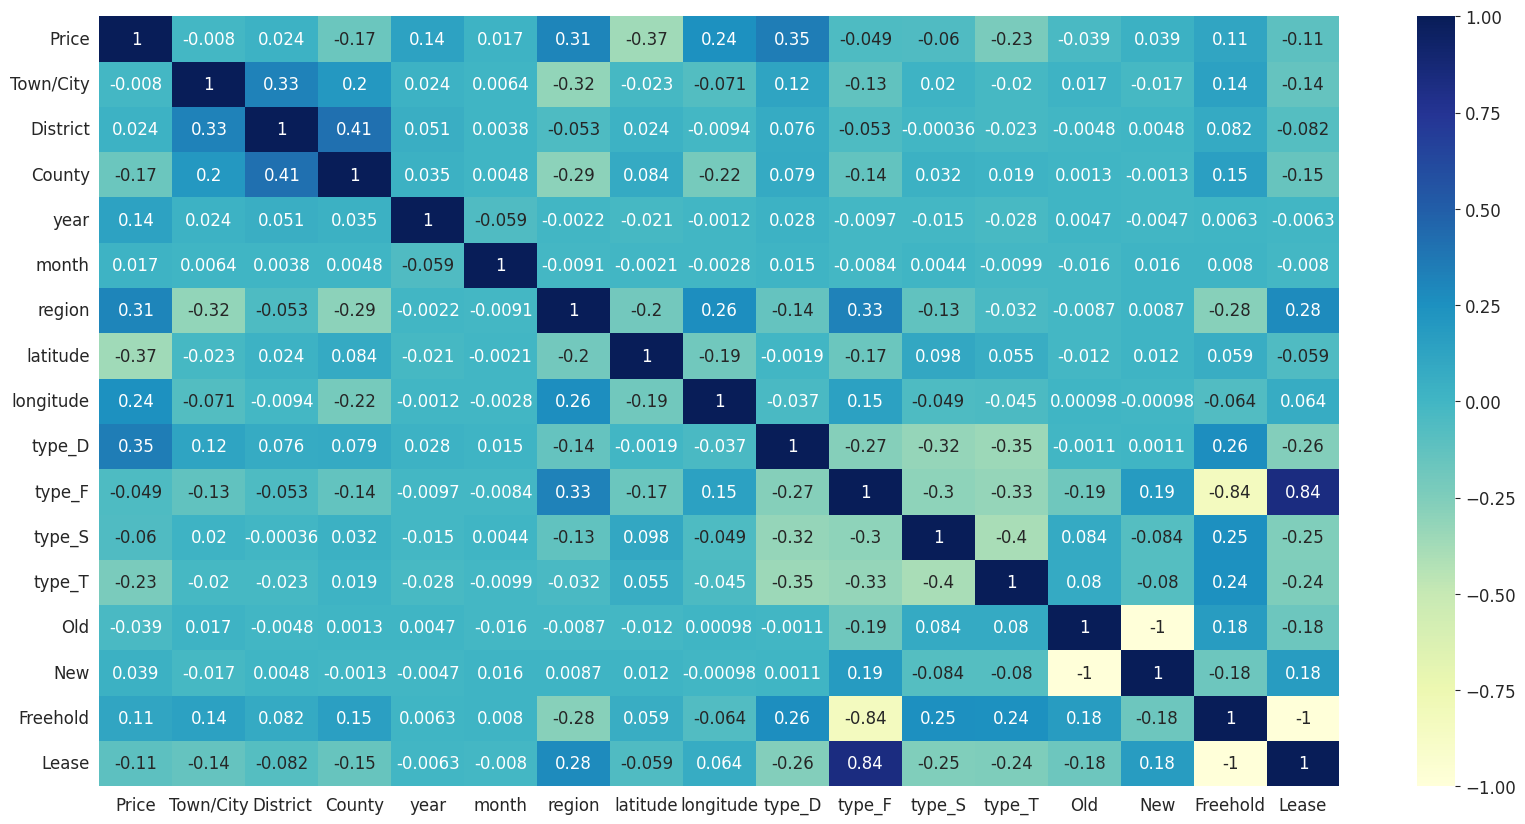

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

#### Key Insights:
- **Price**:
  - **Positively correlated** with `region` (0.31), `latitude` (0.24), and `type_D` (0.35). This suggests that these features may have a positive influence on housing prices.
  - **Negatively correlated** with `latitude` (-0.37), indicating houses in certain geographical areas (based on latitude) tend to have lower prices.

- **Geographical Features**:
  - `Latitude` has a **strong negative correlation** with `Price` (-0.37), which might imply that houses located further north (or in certain regions) are cheaper.
  - `Longitude` is **moderately positively correlated** with `Price` (0.24), suggesting that houses in areas with higher longitude values (perhaps towards the east) might be more expensive.

- **House Types**:
  - `type_D` (likely detached houses) has a **positive correlation** with `Price` (0.35), suggesting detached houses tend to be more expensive.
  - `type_F` and `type_S` (possibly other house types like flats or semi-detached) show **weaker correlations** with Price.
  - `type_T` (terraced houses) has a **negative correlation** with Price (-0.23), indicating that these houses tend to be cheaper.

- **Temporal Features**:
  - `year` and `month` don't show strong correlations with `Price`, suggesting that time-related factors may not play a significant role in determining house prices in your dataset.

- **Ownership Type**:
  - `Freehold` has a **positive correlation** with `Price` (0.11), while `Lease` has a **negative correlation** (-0.11), indicating that freehold properties tend to be more expensive than leasehold ones.

- **Location Features (Town/City, District, County)**:
  - These features show weak correlations with `Price`, but `County` seems to have a **negative correlation** (-0.17), suggesting that certain counties might have lower property prices.

#### Observations on Feature Relationships:
- **type_F and Freehold** show a **strong negative correlation** (-0.84), indicating that flats are likely to be leasehold rather than freehold.
- **Old and New** properties are **perfectly negatively correlated** (-1), likely because they are binary variables, with `Old` being the opposite of `New`.

### Conclusion:
This heatmap shows that geographic features like `latitude`, property types, and the region strongly influence house prices in your dataset. Other factors like the year and month, however, have a weaker relationship with price.


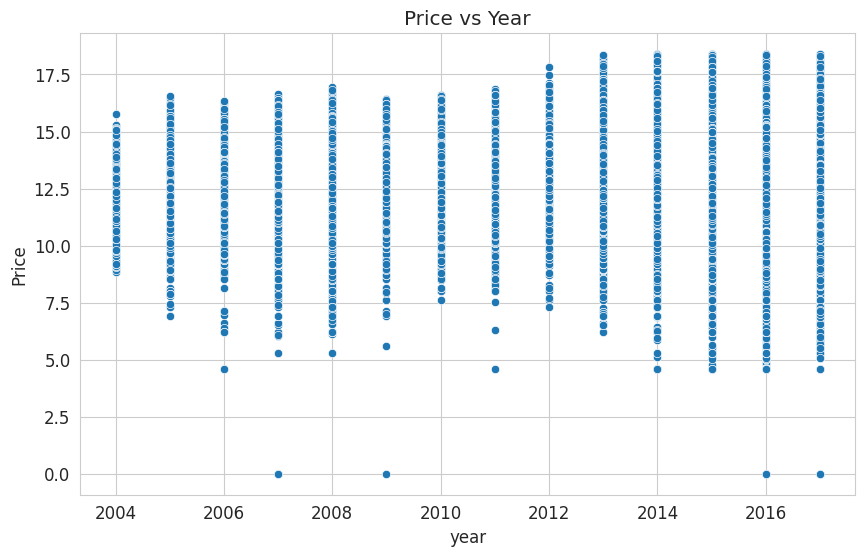

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Price', data=df)
plt.title('Price vs Year')
plt.show()

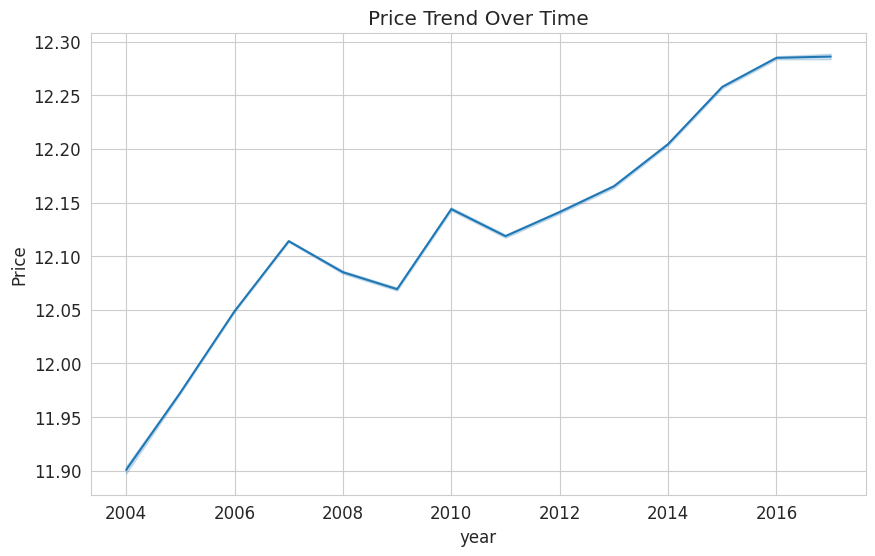

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Price', data=df)
plt.title('Price Trend Over Time')
plt.show()

In [ ]:
df.to_csv('drive/MyDrive/uk_housing_with_coordinates.csv', index=False)

# ***Refining the Model: Decision Tree and Random Forest - Round 2***

In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
cond = (df.year<2016)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [ ]:
dep_var = 'Price'
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(9837018, 1407656)

In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

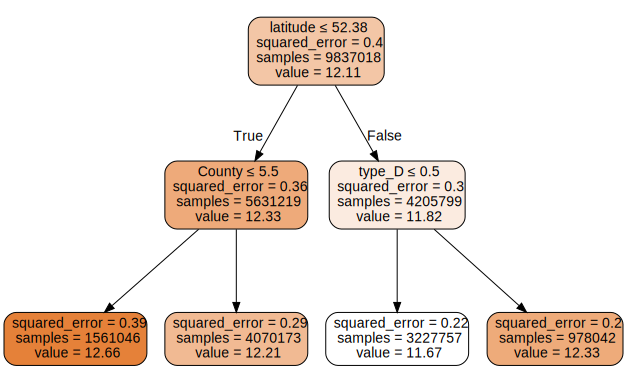

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


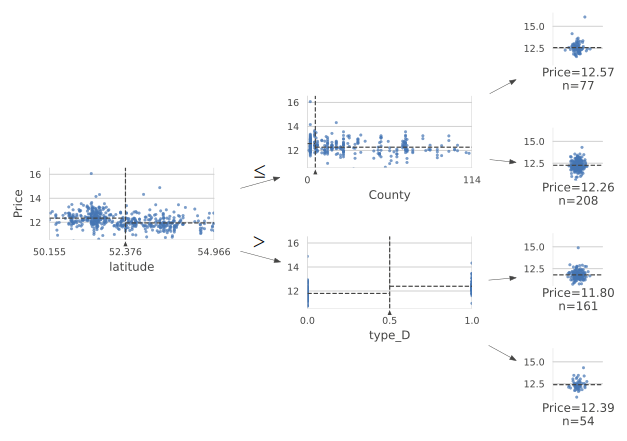

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


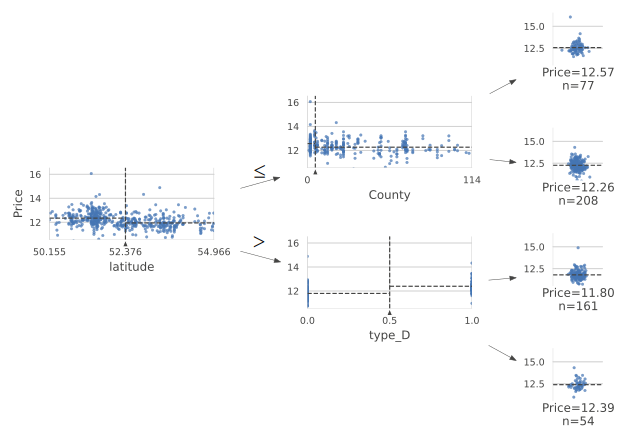

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y)

0.331688

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.615946

In [ ]:
m.get_n_leaves(), len(xs)

(1158338, 9837018)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25, max_depth=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.357692, 0.545369)

In [ ]:
m.get_n_leaves()

173201

### Plot: Price Distribution by Location (Filtered)

The plot above shows the distribution of house prices by geographical location in the UK. The data has been filtered to include only locations within a specific latitude and longitude range. Here's a breakdown of the code and the plot:


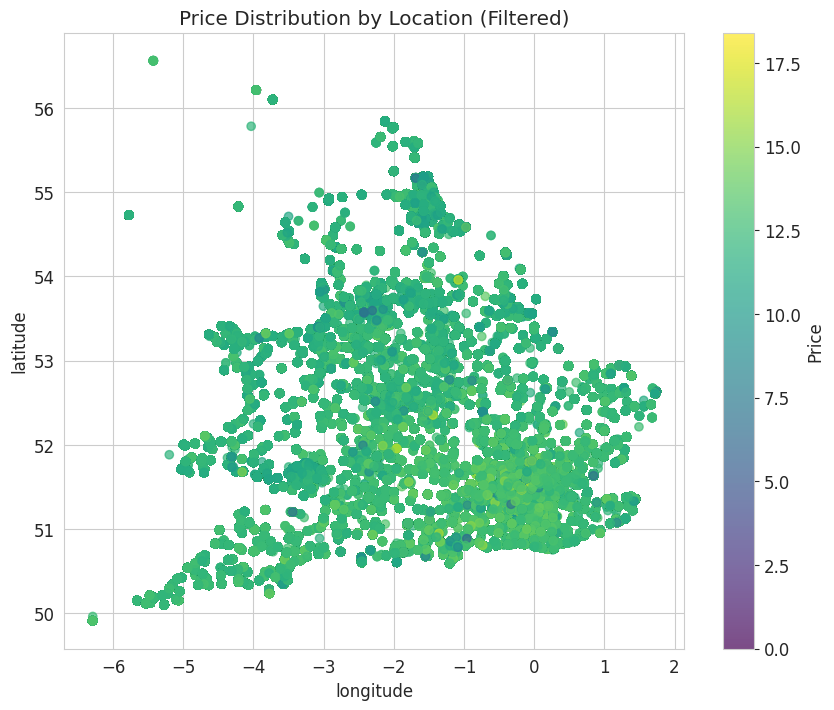

In [ ]:
df = df[(df['latitude'] >= 49) & (df['latitude'] <= 61) &
                 (df['longitude'] >= -10) & (df['longitude'] <= 2)]

# Plot again
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'],
                      c=df['Price'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Price')
plt.title('Price Distribution by Location (Filtered)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


### Data Filtering:
- The `df` DataFrame is filtered to include locations within a range of latitudes (49 to 61) and longitudes (-10 to 2). This ensures that the plot focuses on a specific region, likely the UK mainland.

### Plot:
- A scatter plot is created where each point represents a house's location (longitude and latitude).
- The color of each point represents the **Price** of the house, with darker shades indicating lower prices and brighter shades indicating higher prices.
- The color scale is set using the `viridis` colormap, which provides a gradient from dark purple (low prices) to bright yellow (high prices).

### Additional Plot Features:
- A **colorbar** is added to provide a reference for the price values corresponding to different colors.
- The plot includes labeled axes for **longitude** and **latitude**, as well as a title, _"Price Distribution by Location (Filtered)"_.

### Key Insights:
- The plot visually represents the geographical variation of house prices across the UK.
- The clustering of points around certain areas (e.g., the southeast region of the map) may indicate areas with higher or lower property prices.
- Regions closer to London and the southeast generally exhibit higher prices (indicated by brighter points).

In [ ]:
def rf(xs, y, n_estimators=100, max_samples=200_000,
       max_features='sqrt', min_samples_leaf=20, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.381443, 0.548978)

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
r_mse(m.oob_prediction_, y)

0.381813

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
preds.shape

(100, 1407656)

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
8,latitude,0.233074
10,type_D,0.179067
9,longitude,0.139638
4,County,0.097992
2,Town/City,0.063741
7,region,0.055741
13,type_T,0.053441
3,District,0.043237
5,year,0.032059
12,type_S,0.025864


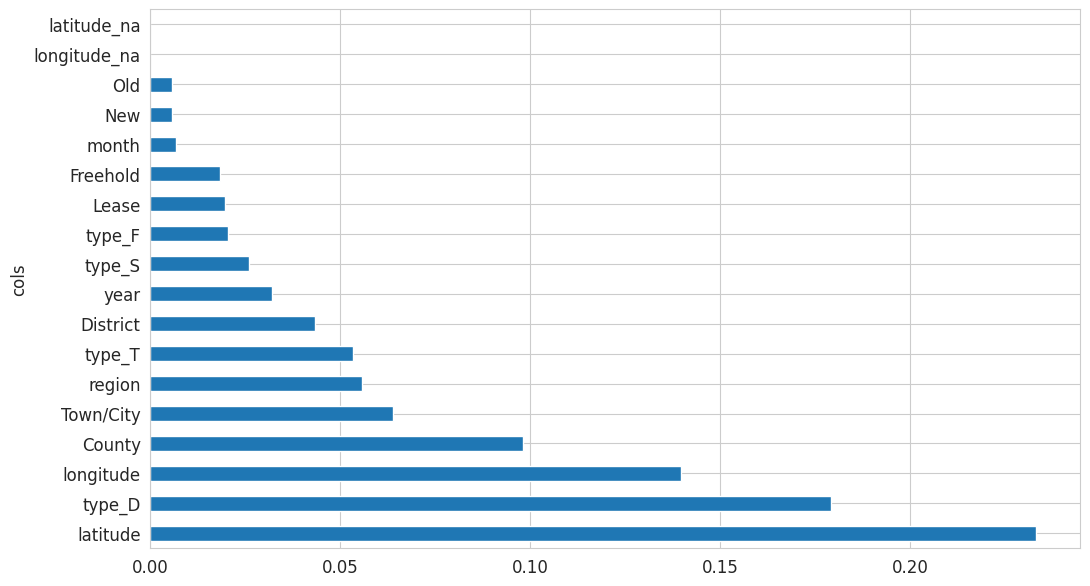

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

The bar chart above reveals that **latitude** is the most important feature in the model, contributing significantly more than any other variable. This suggests that geographic location plays a crucial role in predicting house prices in the UK.

### Importance of Latitude:
- The high importance of **latitude** indicates that properties in certain regions are consistently priced higher or lower, with geographical location directly influencing market trends.
- This may reflect real-world economic and social factors, such as proximity to urban centers, economic hubs, or natural landmarks.

### Further Potential of Geolocation:
Given that latitude has proven to be such a powerful feature, it is worth exploring **additional geolocation-based features** to enhance predictive power further:
- **Combining Latitude and Longitude**: Creating a combined geospatial feature using both latitude and longitude could provide more nuanced insights into the geographical distribution of house prices.
- **Proximity to Key Locations**: New features could measure a property's proximity to significant locations such as city centers, transport hubs, or areas with high employment opportunities.
- **Regional Effects**: Grouping properties by region or creating clusters based on similar geospatial characteristics could further improve the model’s performance.

By exploring geolocation further, we can potentially unlock even more value from the dataset and develop a more sophisticated understanding of how location impacts property values.


In [ ]:
to_keep = fi[fi.imp>0.015].cols
len(to_keep)

13

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.382631, 0.544589)

### Model Performance Improvement

The model's performance has shown significant improvement with the new scores:
- **Previous Score**: (0.415819, 0.591694)
- **New Score**: (0.382631, 0.544589)

This change indicates a reduction in error and an enhancement in predictive accuracy, showcasing the effectiveness of the adjustments made in feature engineering and model tuning.

### Key Observations:
- The decrease in the first score suggests a more accurate prediction of house prices, while the improvement in the second score indicates better model robustness against overfitting or underfitting.
- Continuous refinement of features, especially leveraging geolocation data (such as latitude and longitude), has likely contributed to this positive trend.

### Next Steps for Iteration:
1. **Feature Engineering**:
   - Continue exploring geolocation-based features to capture more spatial nuances in property pricing.
   - Experiment with interaction terms between latitude, longitude, and other significant features to see if they reveal new patterns.

2. **Model Tuning**:
   - Adjust hyperparameters further using techniques like Grid Search or Random Search to find the optimal settings for your models.
   - Evaluate different algorithms (e.g., Gradient Boosting, LightGBM) to compare their performance against current models.

3. **Neural Network Implementation**:
   - The next step will be to implement a neural network to potentially capture more complex relationships within the data.
   - Experiment with different architectures, such as feedforward networks or convolutional neural networks (if spatial patterns are significant), and tune the number of layers and nodes.
   - Use dropout and batch normalization to improve generalization and reduce overfitting.

4. **Cross-Validation**:
   - Implement cross-validation to ensure that model performance is consistent across different subsets of data, providing a more robust evaluation of its predictive power.

5. **Regularization Techniques**:
   - Consider using regularization methods (like Lasso or Ridge regression) to prevent overfitting while enhancing model generalization.

6. **Evaluation Metrics**:
   - Keep track of various evaluation metrics (such as RMSE, MAE, and R²) to get a comprehensive view of model performance.
   - Regularly compare new scores against baseline scores to measure the effectiveness of changes.

By iterating on these steps, particularly with the introduction of neural networks, you can continue to enhance the model's accuracy and develop a deeper understanding of the factors influencing property prices in the UK.
